In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

## Exploratory data analysis

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data.set_index('PassengerId', inplace=True)
test_data.set_index('PassengerId', inplace=True)

In [6]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Let us look up on our data. There is a couple of feature, which we can drop because they make no sense in our exploration.

Cabin: We can see, that the most values of Cabin are null, therefore this feature cannot be usefull for us. We can drop it.

Ticket: The feature Ticket is represented as a string with number of different characters. This feature doesn't give us any usefull information. 

Name: We are going to make a prediction, whether a person survived or not survived. Knowing a name of person doesn't help us classificate if a person survived or not, because each person has a different name. 


In [8]:
modified_train_data = train_data.drop(['Cabin', 'Ticket', 'Name'], axis=1)
modified_test_data = test_data.drop(['Cabin', 'Ticket', 'Name'], axis=1)

In the feature Age there are null values. We can fill null values with mean values of each group of people, for example mean age of men depending on a class and mean age of women dependiong on a class.

In [9]:
modified_train_data['Age'] = modified_train_data['Age'].fillna(round(modified_train_data.groupby(['Sex', 'Pclass'])['Age'].transform('mean')))
modified_test_data['Age'] = modified_test_data['Age'].fillna(round(modified_test_data.groupby(['Sex', 'Pclass'])['Age'].transform('mean')))

The features SibSp and Parch are similar, we can combine them in a feature Family, that gives information how many members of family has a passenger on Titanic.

In [10]:
modified_train_data['Family'] = modified_train_data['SibSp'] + modified_train_data['Parch']
modified_train_data.drop(['SibSp', 'Parch'], axis=1, inplace=True)

modified_test_data['Family'] = modified_test_data['SibSp'] + modified_test_data['Parch']
modified_test_data.drop(['SibSp', 'Parch'], axis=1, inplace=True)

We can see, that Fare specify the price of ticket for whole family. Let us calculate the price of ticket for each person.

In [11]:
modified_train_data['Fare'] = modified_train_data['Fare']/(modified_train_data['Family'] + 1)
modified_test_data['Fare'] = modified_test_data['Fare']/(modified_test_data['Family'] + 1)

In [12]:
modified_test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   Fare      417 non-null    float64
 4   Embarked  418 non-null    object 
 5   Family    418 non-null    int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 22.9+ KB


One value in Fare in the test dataset is null

In [13]:
modified_test_data[modified_test_data.Fare.isnull()]

,Pclass,Sex,Age,Fare,Embarked,Family
PassengerId,,,,,,
1044,3,male,60.5,NaN,S,0


We are going to fill null value with the median value of Fare in the third class

In [14]:
median_third_class = modified_test_data[modified_test_data['Pclass'] == 3].Fare.median()
modified_test_data['Fare'] = modified_test_data['Fare'].fillna(median_third_class)

Let's have a look on the ages distibution of Titanic's passengers

<AxesSubplot:xlabel='Age', ylabel='Count'>

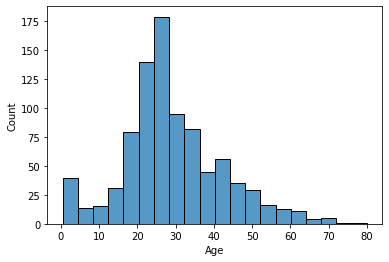

In [15]:
sns.histplot(data=modified_train_data, x="Age", bins=20)

In [16]:
mean_age_survived = modified_train_data[modified_train_data['Survived'] == 1]['Age'].mean()
mean_age_dead = modified_train_data[modified_train_data['Survived'] == 0]['Age'].mean()
print(f'Average age of survived people {round(mean_age_survived)}')
print(f'Average age of dead people {round(mean_age_dead)}')

Average age of survived people 28
Average age of dead people 30


<AxesSubplot:xlabel='Survived', ylabel='Age'>

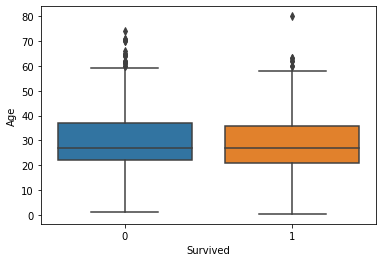

In [17]:
sns.boxplot(data=modified_train_data, x='Survived', y='Age')

Looking at the boxplot above, we can see, that the age's distibution of survived and not survived are almost the same.

How many people were survived depending on Sex and Class?

<AxesSubplot:xlabel='Pclass', ylabel='count'>

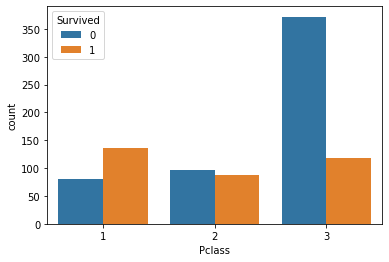

In [18]:
sns.countplot(data=modified_train_data, x='Pclass', hue='Survived')

At the countplot above we can see, that if a passenger has the first or second class, the probability of survival is more, than if he had the third class.

<AxesSubplot:xlabel='Sex', ylabel='count'>

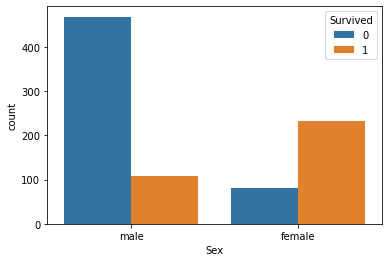

In [19]:
sns.countplot(data=modified_train_data, x='Sex', hue='Survived')

More women were survived than men.

<AxesSubplot:xlabel='Embarked', ylabel='count'>

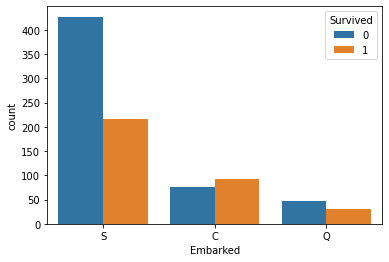

In [20]:
sns.countplot(data=modified_train_data, x='Embarked', hue='Survived')

The countplot shows, if a passenger got on Titanic in Cherbourg he has more chances for survival. You can explain it by showing on the countplot below. Almost half the people, who got on Titanic in Cherbourg had the first class.

<AxesSubplot:xlabel='Embarked', ylabel='count'>

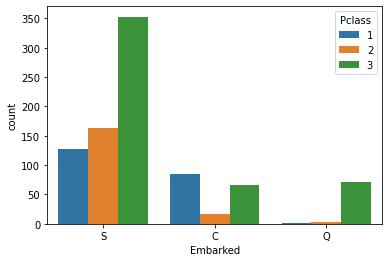

In [21]:
sns.countplot(data=modified_train_data, x='Embarked', hue='Pclass')

## Feature engineering

In order to make machine learning algorithms working properly we have to convert our cathegorical variables into indicator variables. We can do this with the pandas.get_dummies() method

In [22]:
modified_train_data = pd.get_dummies(modified_train_data)
modified_test_data = pd.get_dummies(modified_test_data)

In [23]:
modified_train_data.head()

,Survived,Pclass,Age,Fare,Family,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,0,3,22.0,3.62500,1,0,1,0,0,1
2,1,1,38.0,35.64165,1,1,0,1,0,0
3,1,3,26.0,7.92500,0,1,0,0,0,1
4,1,1,35.0,26.55000,1,1,0,0,0,1
5,0,3,35.0,8.05000,0,0,1,0,0,1


Actually it is not important for us how many relatives a passenger has. For us is important, whether having a relatives on Titanic affects the survival of a passenger. So we can modify our Family feature. 0 - alone, 1 - with a family

In [24]:
modified_train_data['Family'] = modified_train_data['Family'].apply(lambda x: 1 if x > 0 else 0)
modified_test_data['Family'] = modified_test_data['Family'].apply(lambda x: 1 if x > 0 else 0)

We don't need two columns Sex_female and Sex_male, because they shows the same and we can use one of them

In [25]:
modified_train_data.drop('Sex_female', axis=1, inplace=True)
modified_test_data.drop('Sex_female', axis=1, inplace=True)

In [160]:
modified_train_data.head()

,Survived,Pclass,Age,Fare,Family,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,0,3,22.0,3.62500,1,1,0,0,1
2,1,1,38.0,35.64165,1,0,1,0,0
3,1,3,26.0,7.92500,0,0,0,0,1
4,1,1,35.0,26.55000,1,0,0,0,1
5,0,3,35.0,8.05000,0,1,0,0,1


Our train dataset is ready to machine learning. In the next chapter we apply different classifiers to our data, such as Desicion tree, KNN, Naive Bayes, SVM, Random Forests and Logistic Regression, and compare metrics of these classifiers. 

## Machine Learning

In [28]:
modified_train_data

,Survived,Pclass,Age,Fare,Family,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,0,3,22.0,3.62500,1,1,0,0,1
2,1,1,38.0,35.64165,1,0,1,0,0
3,1,3,26.0,7.92500,0,0,0,0,1
4,1,1,35.0,26.55000,1,0,0,0,1
5,0,3,35.0,8.05000,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
887,0,2,27.0,13.00000,0,1,0,0,1
888,1,1,19.0,30.00000,0,0,0,0,1
889,0,3,22.0,5.86250,1,0,0,0,1


### Decision Trees

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

We are going to build a decision tree. Decision trees tend to overfit. Using class GridSearchCV we can find optimal parameters for our decision tree.

In [253]:
X_train = modified_train_data.drop('Survived', axis=1)
y_train = modified_train_data['Survived']
parameters = {'max_depth': range(1, 15, 2), 'min_samples_split': range(5, 100, 5), 'min_samples_leaf':range(5, 100, 5)}
clf = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parameters, cv=5, n_jobs=-1)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 15, 2),
                         'min_samples_leaf': range(5, 100, 5),
                         'min_samples_split': range(5, 100, 5)})

In [254]:
print(f'Best parameters: {clf.best_params_}')
print(f'Best score: {clf.best_score_}')

Best parameters: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 5}
Best score: 0.8238026489234826


Let us make a dicision tree with these parameters and train our model.

In [255]:
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5, min_samples_split=5)
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       min_samples_split=5)

Let us make a prediction, using test data.

In [256]:
X_test = modified_test_data
y_pred = clf_tree.predict(X_test)

In [257]:
output_decision_tree = pd.DataFrame({'PassengerId': X_test.index, 'Survived': y_pred})

In [258]:
output_decision_tree.to_csv('titanic_decision_tree_submissions.csv', index=False)

After submiting the accuracy score war 77%

### Naive Bayse

In [178]:
from sklearn.naive_bayes import CategoricalNB

Naive Bayse alghorithm performes well in case of descrete variable compared to continuous variable and  with assumption of independent features. Make and check an assumption, that passengers over 16 years old have lower chances for survive.

In [157]:
under_sixteen = modified_train_data[modified_train_data['Age'] < 16].Survived
over_sixteen = modified_train_data[modified_train_data['Age'] > 16].Survived

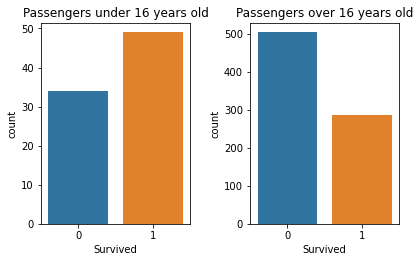

In [159]:
fig, ax = plt.subplots(1, 2)
sns.countplot(x=under_sixteen, ax=ax[0])
sns.countplot(x=over_sixteen, ax=ax[1])
ax[0].title.set_text('Passengers under 16 years old')
ax[1].title.set_text('Passengers over 16 years old')
fig.tight_layout(pad=2.0)

Let'us change countinuous feature Age to a categorical feature Over_16_years_old.

In [172]:
modified_train_data['Over_16_years_old'] = modified_train_data['Age'].apply(lambda x: 1 if x > 16 else 0)
modified_test_data['Over_16_years_old'] = modified_test_data['Age'].apply(lambda x: 1 if x > 16 else 0)

In [183]:
modified_train_data.drop('Age', axis=1, inplace=True)
modified_test_data.drop('Age', axis=1, inplace=True)

In [175]:
modified_train_data.head()

,Survived,Pclass,Fare,Family,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Over_16_years_old
PassengerId,,,,,,,,,
1,0,3,3.62500,1,1,0,0,1,1
2,1,1,35.64165,1,0,1,0,0,1
3,1,3,7.92500,0,0,0,0,1,1
4,1,1,26.55000,1,0,0,0,1,1
5,0,3,8.05000,0,1,0,0,1,1


We make a logical assumption, that the higher the fare, the higher the class und drop the feature Fare.

In [185]:
naive_bayse_train_data = modified_train_data.drop('Fare', axis=1)
naive_bayse_test_data = modified_test_data.drop('Fare', axis=1)

In [188]:
X_naive_bayse_train_data = naive_bayse_train_data.drop('Survived', axis=1)
y_naive_bayse_train_data = naive_bayse_train_data['Survived']

Everything is ready for training our data with Naive Bayes algorithm.

In [194]:
clf = CategoricalNB()
clf.fit(X_naive_bayse_train_data, y_naive_bayse_train_data)
y_pred_naive_bayes = clf.predict(naive_bayse_test_data)
output_naive_bayes = pd.DataFrame({'PassengerId': naive_bayse_test_data.index, 'Survived': y_pred_naive_bayes})

In [198]:
output_naive_bayes.to_csv('titanic_naive_bayse_submissions.csv', index=False)

After submiting the accuracy score war 75%

### Nearest Neighbors

In [200]:
from sklearn.neighbors import KNeighborsClassifier

In [241]:
X_knn_train_data = modified_train_data.drop(['Survived','Fare'], axis=1)
y_knn_train_data = modified_train_data['Survived']

Let us find the optimal number of neighbors

In [244]:
parameters = {'n_neighbors': range(3, 50, 2)}
knn_grid = GridSearchCV(KNeighborsClassifier(), parameters, cv=5)
knn_grid.fit(X_knn_train_data, y_knn_train_data)
print(f'Best parameters: {knn_grid.best_params_}')
print(f'Best score: {knn_grid.best_score_}')

Best parameters: {'n_neighbors': 15}
Best score: 0.8069675475488042


In [245]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_knn_train_data, y_knn_train_data)

KNeighborsClassifier(n_neighbors=15)

In [240]:
y_pred_knn = knn.predict(modified_test_data)
output_knn = pd.DataFrame({'PassengerId': modified_test_data.index, 'Survived': y_pred_knn})
output_knn.to_csv('titanic_knn_submissions.csv', index=False)

After submitting the accuracy score war 78%

### Support Vector Machine

In [259]:
from sklearn.svm import SVC

In [264]:
X_svm_train_data = modified_train_data.drop(['Survived'], axis=1)
y_svm_train_data = modified_train_data['Survived']

Let us select optimal parameters for the alghorithm: kernel and regularisation

In [277]:
parameters = {'kernel':['rbf', 'poly'], 'C': [1, 10, 100, 1000]}
svm_grid = GridSearchCV(SVC(), parameters, cv=5, n_jobs=-1)
svm_grid.fit(X_svm_train_data, y_svm_train_data)
print(f'Best parameters: {svm_grid.best_params_}')
print(f'Best score: {svm_grid.best_score_}')

Best parameters: {'C': 1000, 'kernel': 'rbf'}
Best score: 0.7856129558721989


In [278]:
svm = SVC(kernel='rbf', C=1000)
svm.fit(X_svm_train_data, y_svm_train_data)

SVC(C=1000)

In [279]:
y_pred_svm = svm.predict(modified_test_data)
output_svm = pd.DataFrame({'PassengerId': modified_test_data.index, 'Survived': y_pred_svm})
output_svm.to_csv('titanic_svm_submissions.csv', index=False)

After submitting the accuracy score war 76.5%